# Latihan Pertemuan 7 - PCD

- Syakib Binnur
- 05TPLK001
- 221011450394

In [36]:
# Import Library

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## 1. Studi Kasus 1: Pengenalan Buah dan Sayuran dalam Industri Pertanian

Studi kasus ini bertujuan untuk menggunakan teknik segmentasi citra dan ekstraksi fitur warna dalam mengenali berbagai jenis buah dan sayuran berdasarkan gambar. Pengenalan objek dalam citra digital sangat penting dalam berbagai aplikasi industri pertanian, seperti pemantauan kualitas tanaman atau pengolahan hasil pertanian secara otomatis.

**Langkah-langkah yang Dilakukan:**
1. **Membaca Gambar:** Gambar buah dan sayuran diambil dari folder yang telah disediakan.
2. **Konversi ke Model Warna HSV:** Gambar dikonversi dari model warna BGR (default di OpenCV) ke HSV (Hue, Saturation, Value), yang lebih efektif untuk segmentasi berbasis warna.
3. **Segmentasi:** Dengan menggunakan thresholding HSV, sebuah mask dibuat untuk menyaring warna-warna tertentu, seperti warna dominan dari buah atau sayuran.
4. **Ekstraksi Fitur:** Dari hasil segmentasi, dihitung rata-rata nilai Hue untuk menggambarkan warna dominan objek dalam gambar.
5. **Visualisasi Hasil:** Hasil segmentasi ditampilkan untuk menunjukkan bagian mana dari gambar yang terdeteksi sebagai objek (buah atau sayuran).

Dengan pendekatan ini, objek dapat dipisahkan dari latar belakang berdasarkan warna, dan ciri khas warna buah atau sayuran dapat dianalisis.

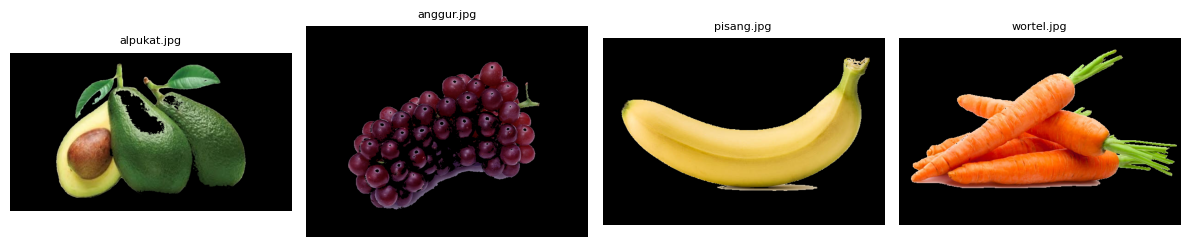

Fitur Ekstrak Tiap Gambar:
alpukat.jpg - Hue Rata-rata: 42.85
anggur.jpg - Hue Rata-rata: 163.12
pisang.jpg - Hue Rata-rata: 22.59
wortel.jpg - Hue Rata-rata: 16.17


In [64]:
folder_path = 'buah-sayuran/'

# Simpan hasil fitur
features = []
images = []
titles = []

# Loop setiap file gambar
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        filepath = os.path.join(folder_path, filename)
        image = cv2.imread(filepath)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Segmentasi berdasarkan HSV
        lower = np.array([0, 50, 50])
        upper = np.array([180, 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        segmented = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

        # Hitung hue rata-rata
        hue_values = hsv[:,:,0][mask > 0]
        avg_hue = np.mean(hue_values) if len(hue_values) > 0 else 0

        features.append({
            'nama_file': filename,
            'hue_rata2': avg_hue
        })

        images.append(segmented)
        titles.append(filename)

# Tampilkan semua gambar dalam satu baris
plt.figure(figsize=(12, 4))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Tampilkan fitur
print("Fitur Ekstrak Tiap Gambar:")
for f in features:
    print(f"{f['nama_file']} - Hue Rata-rata: {f['hue_rata2']:.2f}")


**Insight:**
1. alpukat.jpg (Hue Rata-rata: 42.85): Warna dominan hijau kekuningan, sesuai dengan karakteristik buah alpukat.
2. anggur.jpg (Hue Rata-rata: 163.12): Warna dominan ungu kebiruan, cocok untuk anggur ungu.
3. pisang.jpg (Hue Rata-rata: 22.59): Warna dominan kuning cerah, sesuai dengan pisang yang matang.
4. wortel.jpg (Hue Rata-rata: 16.17): Warna dominan oranye, yang sangat cocok untuk wortel.

Secara keseluruhan, nilai hue rata-rata mencerminkan warna dominan pada masing-masing objek, membantu membedakan buah dan sayuran berdasarkan warnanya.

## 2. Studi Kasus: Segmentasi Organ dalam Citra Medis (X-ray/MRI)

Proses ini bertujuan untuk memisahkan bagian organ dari latar belakang pada citra medis seperti X-ray. Metode yang digunakan adalah **thresholding**, yaitu teknik segmentasi sederhana yang membagi citra berdasarkan nilai ambang intensitas piksel.

**Langkah-langkah yang Dilakukan:**
1. **Input Citra**: Citra X-ray dibaca dalam skala abu-abu (grayscale).
2. **Segmentasi dengan Thresholding**: Piksel yang memiliki intensitas di atas nilai tertentu dianggap sebagai bagian dari organ (misalnya tulang), sedangkan piksel lainnya diabaikan.
3. **Visualisasi**: Menampilkan perbandingan citra asli dengan hasil segmentasi biner.

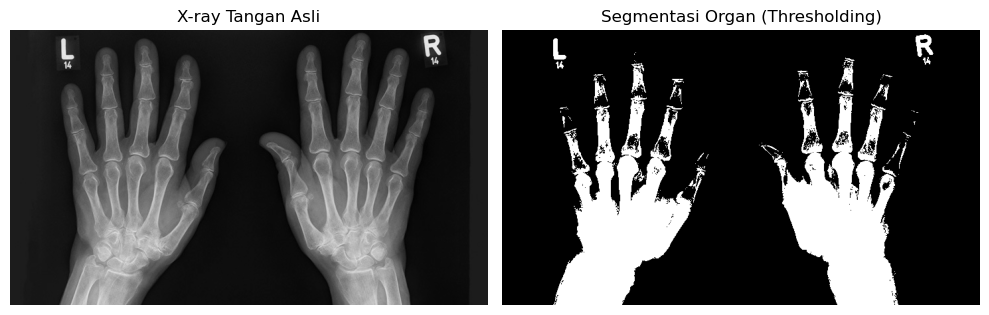

In [44]:
image = cv2.imread('handxray.jpg', cv2.IMREAD_GRAYSCALE)

# Tentukan ambang batas untuk segmentasi (misalnya, memisahkan tulang dari latar belakang)
_, segmented_image = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)

# Menampilkan gambar asli dan hasil segmentasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("X-ray Tangan Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("Segmentasi Organ (Thresholding)")
plt.axis('off')

plt.tight_layout()
plt.show()


**Insight:**
- Metode thresholding membantu menyoroti struktur organ seperti tulang dalam citra X-ray dengan memisahkannya dari latar belakang. Teknik ini cocok untuk segmentasi awal sebelum dilanjutkan ke analisis lanjutan seperti klasifikasi atau pengukuran morfologi.

## 3. Studi Kasus: Pelacakan Bola Sepak di Lapangan Hijau

Pelacakan bola sepak dalam gambar dapat dilakukan dengan mendeteksi warna lapangan dan warna bola. Lapangan biasanya berwarna hijau, sedangkan bola memiliki warna terang seperti putih. Langkah-langkah utamanya adalah:
- Menghilangkan area lapangan dengan masking warna hijau.
- Menyaring area terang yang berpotensi merupakan bola.
- Menemukan kontur pada area tersebut, lalu menggambar lingkaran di sekeliling objek yang terdeteksi sebagai bola.

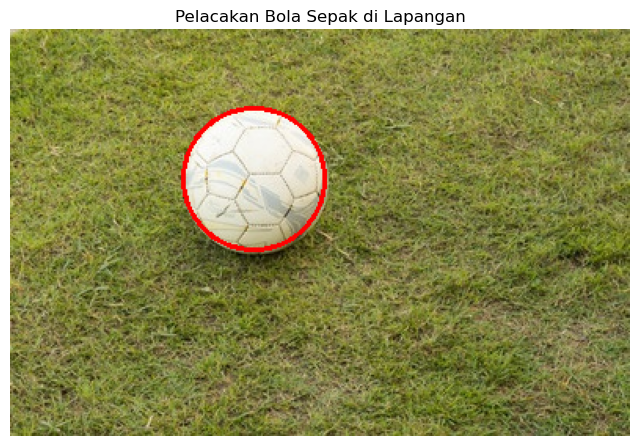

In [48]:
image_path = 'ball.jpg'

image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Mask untuk lapangan hijau (menghilangkan background hijau)
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])
field_mask = cv2.inRange(hsv, lower_green, upper_green)
field_removed = cv2.bitwise_not(field_mask)

# Deteksi area terang (bola biasanya berwarna putih)
bright_mask = cv2.inRange(hsv, (0, 0, 200), (180, 55, 255))
ball_mask = cv2.bitwise_and(bright_mask, field_removed)

# Temukan kontur bola
contours, _ = cv2.findContours(ball_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Gambar lingkaran pada bola jika ditemukan
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 50:
        (x, y), radius = cv2.minEnclosingCircle(cnt)
        center = (int(x), int(y))
        radius = int(radius)
        cv2.circle(image_rgb, center, radius, (255, 0, 0), 2)  # lingkaran biru

# Tampilkan hasil
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Pelacakan Bola Sepak di Lapangan")
plt.axis('off')
plt.show()

**Insight:**
- Pendekatan ini dapat mendeteksi bola berdasarkan warna terang dan bentuknya yang cenderung bulat. Namun, hasil deteksi bisa terganggu jika objek lain seperti jersey pemain atau garis lapangan juga berwarna putih. Oleh karena itu, proses segmentasi harus disesuaikan dengan karakteristik gambar yang digunakan.

## 4. Segmentasi Citra dengan Sobel

Deteksi tepi dengan operator Sobel dilakukan dengan menghitung perubahan intensitas piksel pada arah horizontal (x) dan vertikal (y). Hasil deteksi ini menunjukkan batas-batas objek dalam gambar. Segmentasi dilakukan dengan menggunakan hasil tepi tersebut untuk memisahkan objek dari latar belakang.

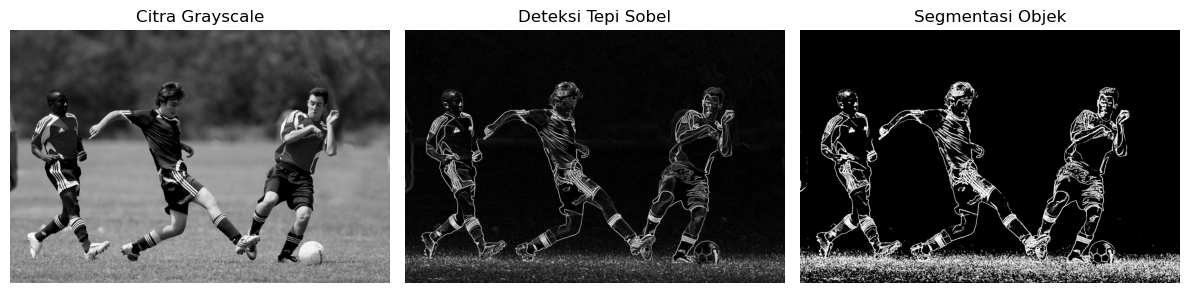

In [52]:
image = cv2.imread('football.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan Sobel di arah x dan y
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Gabungkan hasil gradien
sobel = cv2.magnitude(sobelx, sobely)
sobel = np.uint8(np.clip(sobel, 0, 255))

# Threshold untuk segmentasi
_, segmented = cv2.threshold(sobel, 50, 255, cv2.THRESH_BINARY)

# Tampilkan hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel, cmap='gray')
plt.title('Deteksi Tepi Sobel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(segmented, cmap='gray')
plt.title('Segmentasi Objek')
plt.axis('off')

plt.tight_layout()
plt.show()

**Insight:**
- Operator Sobel efektif mendeteksi tepi objek dalam citra grayscale. Segmentasi berbasis tepi dapat memisahkan objek utama, namun dapat terganggu oleh noise atau tekstur detail di latar belakang.

## **5. Deteksi Tepi Canny untuk Pengolahan Citra Medis**

Deteksi tepi adalah langkah penting dalam pengolahan citra medis karena dapat menyoroti batas organ atau struktur dalam tubuh. Pada tugas ini, digunakan metode **Canny edge detection** tanpa filter atau segmentasi tambahan, agar batas organ dalam citra X-ray dapat langsung terlihat.

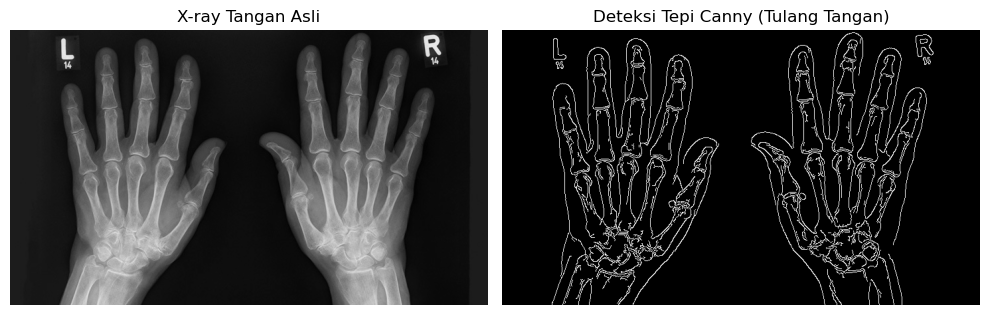

In [56]:
image = cv2.imread('handxray.jpg', cv2.IMREAD_GRAYSCALE)

# Terapkan deteksi tepi Canny langsung pada citra
edges = cv2.Canny(image, threshold1=50, threshold2=150)

# Menampilkan gambar asli dan hasil deteksi tepi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("X-ray Tangan Asli")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title("Deteksi Tepi Canny (Tulang Tangan)")
plt.axis('off')

plt.tight_layout()
plt.show()


**Insight:**
- Deteksi tepi Canny menyoroti garis-garis tajam dalam citra medis, seperti batas tulang atau organ. Ini berguna untuk proses lanjutan seperti pengenalan bentuk, pengukuran, atau pelacakan perubahan anatomi secara visual.